# Exploratory data analysis

In [92]:
import pandas as pd  
import numpy as np
import warnings 
import math
warnings.simplefilter('ignore')
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt


#### open cleaned data 

In [93]:
df = pd.read_csv("../data/cleaned/NCDB_cleaned_N1348.csv")
print("Number of complete records: {}".format(df.shape[0]))
print("Number of variables: {}".format(df.shape[1]))
df.head()

Number of complete records: 513
Number of variables: 12


,AGE,SEX,tumor_size_bins_cm,tumor_site,immuno_suppressed,tumor_lymphocytes,lymph_vasc_invasion,tumor_depth,regional_nodes_positive_bin,regional_nodes_ITC_bin,lymph_node_mets_bin,metastasis
0,58,1,1.0,extremity,0,0,0.0,3.8,0,0.0,0,0
1,63,1,1.0,extremity,0,0,0.0,1.0,0,0.0,0,0
2,76,1,1.0,head_neck,0,1,0.0,9.4,1,1.0,1,1
3,65,1,1.0,extremity,0,0,1.0,0.8,1,1.0,1,1
4,67,2,1.0,other,0,1,0.0,8.5,0,0.0,0,0


In [94]:
# outcome variable 
df.metastasis.value_counts()

0    379
1    134
Name: metastasis, dtype: int64

## Explore features: tumor characteristics 
### size vs. depth

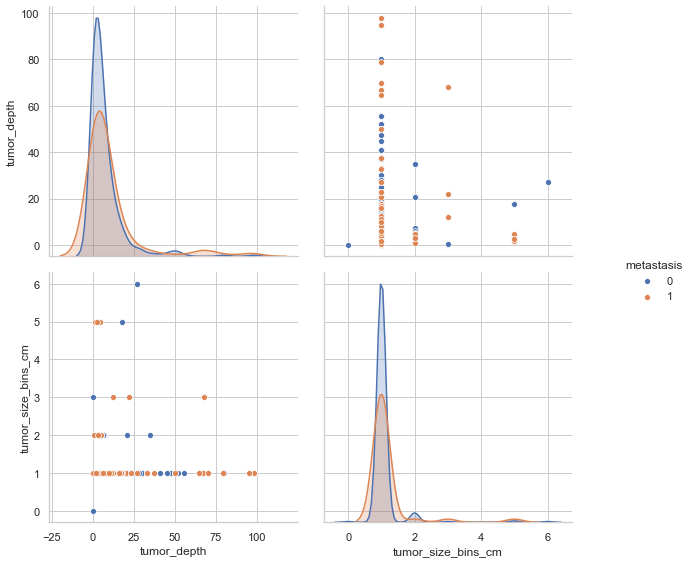

In [114]:
sns.set_style('whitegrid')
g = sns.pairplot(data = df[['tumor_depth', 'tumor_size_bins_cm', 'metastasis']],
             hue = "metastasis")
g.fig.set_figwidth (10)
g.fig.set_figheight(8)

### Location of the tumor

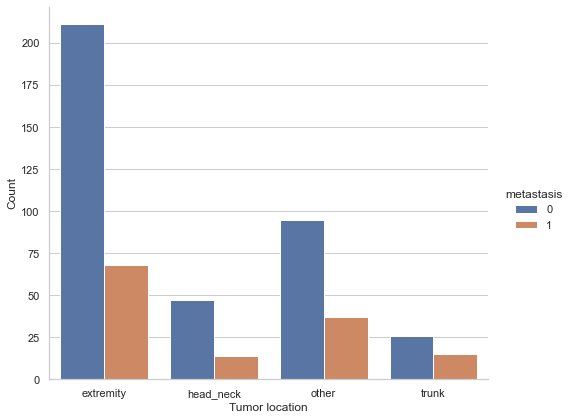

In [115]:
g= sns.catplot(data = df,
                     x ="tumor_site" , kind = "count",
                     hue = "metastasis" , height = 6)
g.set(xlabel = "Tumor location", ylabel = "Count")
g.fig.set_figwidth (8)
g.fig.set_figheight(6);

### tumor infiltrating lymphocytes present?
binarized variable

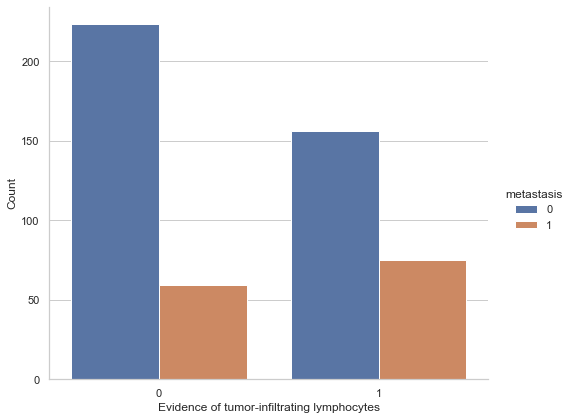

In [132]:
g= sns.catplot(data = df, 
                     x = "tumor_lymphocytes", kind = "count",
                     hue = "metastasis", height = 6)
g.set(xlabel = "Evidence of tumor-infiltrating lymphocytes", ylabel = "Count")
g.fig.set_figwidth (8)
g.fig.set_figheight(6);

### Tumor cells have invaded lymphatic channels
Indicates the presence or absence of tumor cells in lymphatic channels (not lymph nodes) or blood vessels within the primary tumor as noted microscopically by the pathologist.

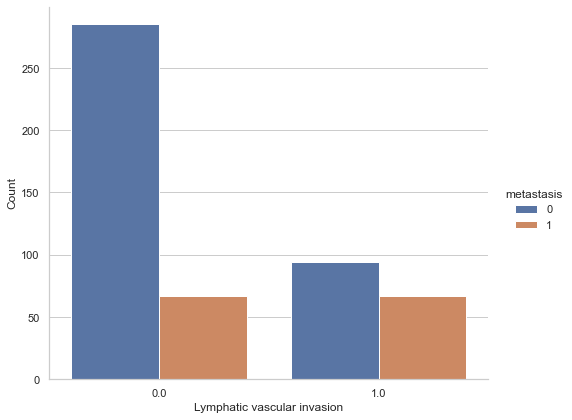

In [117]:

g= sns.catplot(data = df, x = "lymph_vasc_invasion", kind = "count",
                     hue = "metastasis", height = 6)
g.set(xlabel = "Lymphatic vascular invasion", ylabel = "Count")
g.fig.set_figwidth (8)
g.fig.set_figheight(6);

### Immunosuppressed

e.g. HIV/AIDS, leukemia, lymphoma


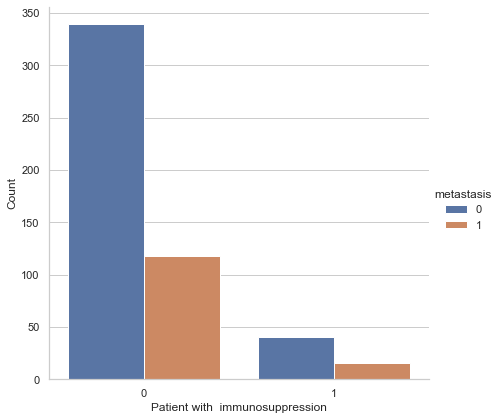

In [118]:
g= sns.catplot(data = df, 
                     x = "immuno_suppressed", kind = "count",
                     hue = "metastasis", height = 6)
g.set(xlabel = "Patient with  immunosuppression", ylabel = "Count");

### Association with age?

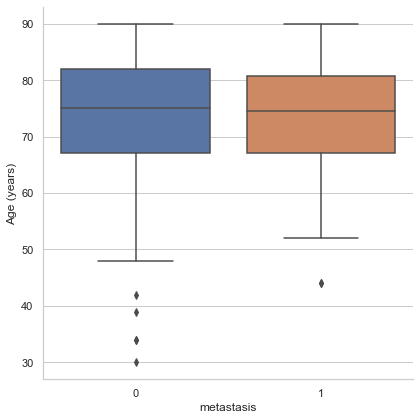

In [119]:
g= sns.catplot(data = df,
                     x = "metastasis", y = "AGE", kind = "box",
                      height = 6)
g.set( ylabel = "Age (years)");

### Association with sex?

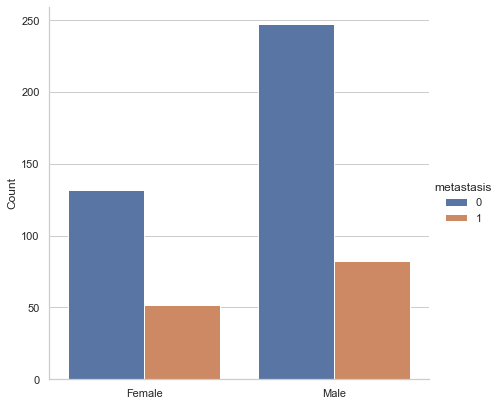

In [129]:
# how to change labels...
df['Sex'] = df.SEX.apply(lambda x: 'Male' if x == 1 else 'Female').astype('category')

g= sns.catplot(data = df,  x = "Sex", kind = "count",
                     hue = "metastasis", height = 6)
g.set(xlabel = "", ylabel = "Count");